In [1]:
# 설치후 주석
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

!pip install pandas-datareader

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 453 kB 66.3 MB/s 
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/e

In [2]:
# 코랩
from google.colab import drive
drive.mount("/content/drive")

# 경로 설정 #
import os
path = '/content/drive/MyDrive/krx_nlp' # 본인 구글 드라이브 계정마다 살짝씩 다를 수도 있음
os.chdir(path)

Mounted at /content/drive


## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
from konlpy.tag import Kkma    
from konlpy.tag import Hannanum    
from konlpy.tag import Okt        
from konlpy.tag import *

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터 불러오기

### 크롤링 데이터

In [2]:
# 종목 설정
# LG화학, 삼성SDI, SK이노베이션, 고려아연, 포스코케미칼
stock_name = '삼성SDI'

In [3]:
# # 사용시 주석 해제
# naver_news = pd.read_csv('./data/refined_naver_news.csv', index_col=0)
# daum_news = pd.read_csv('./data/refined_daum_news.csv', index_col=0)
# naver_talks = pd.read_csv(f'./data/refined_naver_talks_{stock_name}.csv', index_col=0)
# daum_talks = pd.read_csv(f'./data/refined_daum_talks_{stock_name}.csv', index_col=0)
# youtube = pd.read_csv(f'./data/refined_youtube_{stock_name}.csv', index_col=0)

In [4]:
# # 사용시 주석 해제
# # 토론방 날짜 변환
# naver_talks['Date'] = pd.to_datetime(naver_talks['Date'])
# daum_talks['Date'] = pd.to_datetime(daum_talks['Date'])

In [5]:
# # 사용시 주석 해제
# # 뉴스 데이터 합치기
# news_df = pd.concat([naver_news, daum_news, naver_talks, daum_talks ,youtube])
# # 뉴스 데이터 날짜 변환 및 정렬
# news_df['Date'] = pd.to_datetime(news_df['Date'].astype(str))     # str(변수) 는 자체 내장함수, 변수 하나씩밖에 적용 안됨.
# news_df.sort_values('Date', ignore_index=True, inplace=True)
# news_df = news_df[news_df[news_df['Date']== '2021-01-04'].index[0]:]


### 주가 데이터

In [6]:
# # 사용시 주석 해제
# stock_df = pd.read_csv(f'./data/{stock_name}_주가_데이터.csv', usecols = ['일자','등락률'])
# stock_df['일자'] = pd.to_datetime(stock_df['일자'])
# stock_df.head()

In [7]:
# # 사용시 주석 해제
# # 시작, 종료 날짜 설정
# start = str(stock_df.iloc[0, 0])
# end = str(stock_df.iloc[-1, 0])
# print(start)
# print(end)

In [8]:
# # 사용시 주석 해제
# # 2진분류
# stock_df['updown'] = 0
# for i in tqdm(range(len(stock_df))):
#     if stock_df['등락률'][i] > 0:
#         stock_df['updown'][i] = 1
#     else:
#         stock_df['updown'][i] = 0
# stock_df.head()

In [9]:
## 뉴스일자 조정(예측대상(주가)의 일자와 맞추기 위해)
# news_df['일자'] = news_df['Date'] + timedelta(days=1)

### 크롤링 & 주가 데이터 합치기

In [10]:
# df = news_df.merge(stock_df)
# df.columns = [df.columns[0], df.columns[1], '주가의 날짜', '등락률(y)', 'updown']
# df.drop_duplicates('Title', inplace = True, ignore_index = True)  # 기사제목 중복 제거
# print(len(df))
# df.head()

### (필요시) Title 에서 종목명 제거하기

In [13]:
# stopstocks = pd.read_csv("./data/종목명.csv", encoding = 'cp949')
# stopstocks = stopstocks['한글 종목약명'].tolist()

# for i in tqdm(range(len(df['Title']))):
#   for stopstock in stopstocks:
#     if stopstock in str(df['Title'][i]):
#       df['Title'][i] = str(df['Title'][i]).replace(stopstock,'')

# csv 저장

# df.to_csv("df(nostockname_v1).csv", mode='w', encoding = 'utf-8-sig') # 파일명 설정

### (필요시) 저장된 df 불러오기(종목명 제거시 오래걸리니 미리 저장해둔걸 불러오기)

In [14]:
df = pd.read_csv("df(nostockname_v1).csv", encoding = 'utf-8-sig')
df.head()

,Unnamed: 0,Date,Title,주가의 날짜,등락률(y),updown
0,0,2021-01-04,코스피 사상 첫 2900 돌파,2021-01-05,2.24,1
1,1,2021-01-04,사설 사이버 방역도 중요하다,2021-01-05,2.24,1
2,2,2021-01-04,마감시황 코스피 2940선 돌파 사상 최고치 경신,2021-01-05,2.24,1
3,3,2021-01-04,코스피 3000 돌파 눈 앞 새해 첫 거래일 2944 45 마감,2021-01-05,2.24,1
4,4,2021-01-04,연초부터 1조 쏜 동학개미 코스피 2 940선 돌파,2021-01-05,2.24,1


## 감성 사전 구축

In [15]:
kkma = Kkma()
hannanum = Hannanum()
okt = Okt()

In [16]:
# Title 전처리 및 df['noun'] 생성 -> Title 에서 명사만 생성
n_ = []
title_rename = []
for i in tqdm(range(len(df))):
    title_rename.append(re.sub("[\(\[].*?[\)\]]", "",str(df.iloc[i]['Title'])))
    n_.append(' '.join(okt.nouns(str(df.iloc[i]['Title']))))
df['nouns'] = n_
df['Title']=title_rename
df = df[df['nouns']!='']
df.head()

100%|██████████| 440062/440062 [11:12<00:00, 654.57it/s]


,Unnamed: 0,Date,Title,주가의 날짜,등락률(y),updown,nouns
0,0,2021-01-04,코스피 사상 첫 2900 돌파,2021-01-05,2.24,1,코스피 사상 첫 돌파
1,1,2021-01-04,사설 사이버 방역도 중요하다,2021-01-05,2.24,1,사설 사이버 방역
2,2,2021-01-04,마감시황 코스피 2940선 돌파 사상 최고치 경신,2021-01-05,2.24,1,마감 황 코스피 선 돌파 사상 최고 치 경신
3,3,2021-01-04,코스피 3000 돌파 눈 앞 새해 첫 거래일 2944 45 마감,2021-01-05,2.24,1,코스피 돌파 눈 앞 새해 첫 거래 일 마감
4,4,2021-01-04,연초부터 1조 쏜 동학개미 코스피 2 940선 돌파,2021-01-05,2.24,1,연초 동학 개미 코스피 선 돌파


In [17]:
# vocab dic 생성
vocab = {}
cnt = 0
for i in tqdm(df['nouns']):
    i = i.split(' ')
    for j in range(len(i)):
        if i[j] in vocab or len(i[j]) <= 1:
            cnt = cnt+1
            pass
        else:
            vocab[i[j]] = 0
print('\n')
print("vocab 개수 :", len(vocab))
# print(vocab)

100%|██████████| 438432/438432 [00:01<00:00, 333579.81it/s]




vocab 개수 : 35213


In [18]:
df['updown'].value_counts()

1    228883
0    209549
Name: updown, dtype: int64

In [19]:
# vocab score 생성
up = df['updown'].value_counts()[1]
down = df['updown'].value_counts()[0]
up_ratio = up/(up+down)
down_ratio = down/(up+down)

import collections
for i,w in tqdm(enumerate(df['nouns'])):
    w = w.split(' ')
    if (df.iloc[i]['updown']==1):
        for j in range(len(w)):
            noun = w[j]
            if len(noun)<=1:
                continue
            vocab[noun] = vocab[noun] + down_ratio
    else:
        for j in range(len(w)):
            noun = w[j]
            if len(noun)<=1:
                continue
            vocab[noun] = vocab[noun] - up_ratio

438432it [00:54, 8095.64it/s]


In [20]:
# vocab

## vocab 정규화

In [21]:
# 1. 클래스를 만들어줍니다.
class UserRobustScaler:
    # 1) 생성자에서 q3, q1, 중앙값을 정의해줍니다.
    def __init__(self):
        self.q3 = None
        self.q1 = None
        self.median_num = None

    # 2) q3, q1, 중앙값을 계산해줍니다.
    def fit(self, arr):
        if arr is None:
            print("fit() missing 1 required positional argument: 'X'")

        self.q3 = np.percentile(arr, 75)
        self.q1 = np.percentile(arr, 25)
        self.median_num = np.median(arr)

    # 3) q3, q1, 중앙값을 계산하며 동시에 scaled를 적용합니다.
    def fit_transform(self, arr):
        if arr is None:
            print("fit_transform() missing 1 required positional argument: 'X'")

        self.q3 = np.percentile(arr, 75)
        self.q1 = np.percentile(arr, 25)
        self.median_num = np.median(arr)

        # RobustScaler 계산 공식을 적용합니다.
        return (arr - self.median_num) / (self.q3 - self.q1)

    # 4) 이미 계산된 q3, q1, 중앙값으로 scaled를 적용합니다.
    def transform(self, arr):
        return (arr - self.median_num) / (self.q3 - self.q1)

# scale 할 리스트
vocab_v = [v for v in vocab.values()]
vocab_v_arr = np.array(vocab_v)

# 3. 직접 만든 scaler의 인스턴스를 생성합니다.
UR = UserRobustScaler()

# 4. 직접 만든 scaler 로 fit_transform합니다.
scaled_list = UR.fit_transform(vocab_v_arr.reshape(-1, 1))
# print("1. 직접 구현 결과: ", scaled_list)


In [22]:
# scale 된 리스트를 추출 후 vocab 값 대체
scaled_list = np.squeeze(scaled_list, axis=1)
for idx, v in enumerate(vocab_v):
  vocab_v[idx] = list(scaled_list)[idx]

for i, k in enumerate(vocab.keys()):
  vocab[k] = vocab_v[i]

## sent_score 설정

In [23]:
# vocab_score 
# vocab
total = []
for i,w  in tqdm(enumerate(df['nouns'])):
    sent_score = 0
    w= w.split(' ')
    for j in w:
        if(len(j)<=1):
            continue
        elif(j not in vocab):
            continue
        else:
            sent_score = sent_score + vocab[j]
    total.append(sent_score/len(w))
df['sent_score'] = total
df.head()

438432it [00:01, 230703.07it/s]


,Unnamed: 0,Date,Title,주가의 날짜,등락률(y),updown,nouns,sent_score
0,0,2021-01-04,코스피 사상 첫 2900 돌파,2021-01-05,2.24,1,코스피 사상 첫 돌파,40.420764
1,1,2021-01-04,사설 사이버 방역도 중요하다,2021-01-05,2.24,1,사설 사이버 방역,-1.711715
2,2,2021-01-04,마감시황 코스피 2940선 돌파 사상 최고치 경신,2021-01-05,2.24,1,마감 황 코스피 선 돌파 사상 최고 치 경신,37.832674
3,3,2021-01-04,코스피 3000 돌파 눈 앞 새해 첫 거래일 2944 45 마감,2021-01-05,2.24,1,코스피 돌파 눈 앞 새해 첫 거래 일 마감,36.599009
4,4,2021-01-04,연초부터 1조 쏜 동학개미 코스피 2 940선 돌파,2021-01-05,2.24,1,연초 동학 개미 코스피 선 돌파,20.068049


### sent_score 기준으로 라벨링하기(sent_label)

In [24]:
df['sent_score'].describe()

# np.median(df['sent_score'])

count    438432.000000
mean         14.038224
std          47.135388
min        -263.445956
25%          -8.992338
50%           5.104655
75%          32.772486
max         444.031577
Name: sent_score, dtype: float64

In [25]:
# default : 
dft_ = []
for i in tqdm(range(len(df))):
  if(df.iloc[i]['sent_score'] > 5.104655): # median
      dft_.append(1)
  else:
      dft_.append(0)

df['sent_label'] = dft_
df['sent_label'].value_counts()
print(df['sent_label'].value_counts())

100%|██████████| 438432/438432 [00:48<00:00, 9067.70it/s]


1    219216
0    219216
Name: sent_label, dtype: int64


## X_train, Y_train 설정

In [26]:
df.dropna(how='any',inplace= True)

# mecab = Mecab() 
# df['tokenized'] = df['Title'].apply(mecab.morphs)   # 또는 자유롭게 라이브러리 사용

df['tokenized'] = df['Title'].apply(okt.morphs)   # 또는 자유롭게 라이브러리 사용

X_train = df['tokenized'].values
Y_train = df['sent_label'].values

X_train

array([list(['코스피', '사상', '첫', '2900', '돌파']),
       list(['사설', '사이버', '방역', '도', '중요하다']),
       list(['마감', '시', '황', '코스피', '2940', '선', '돌파', '사상', '최고', '치', '경신']),
       ..., list(['주', '가연', '계', '증권', 'MY', 'E', '5000', '호', '공모']),
       list(['주가', '하락', '장서', '역주행', '모든', '사업', '부가', '호황']),
       list(['불', '붙은', '원숭이', '두창', '진단', '경쟁', '국내', '최대', '도', '개발', '중', 'Why', '바이오'])],
      dtype=object)

## 빈도수 낮은 단어 제외

In [27]:
# from konlpy.tag import Mecab
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# 빈도 수가 낮은 단어 제거
threshold = 3 # 3개 미만이면 제거

words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tqdm(tokenizer.word_counts.items()):
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print("전체 단어 수 :", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율 : {}".format((rare_cnt/words_cnt) * 100))
print("희귀 단어 등장 빈도 비율 : {}".format((rare_freq / words_freq) * 100))

100%|██████████| 84739/84739 [00:00<00:00, 1205307.67it/s]

전체 단어 수 : 84739
빈도가 2 이하인 희귀 단어 수 : 45520
희귀 단어 비율 : 53.717886687357655
희귀 단어 등장 빈도 비율 : 1.291812882914292


In [28]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

39221


In [29]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
# X_vali = tokenizer.texts_to_sequences(X_vali)

## Title 평균 길이를 구하고 max_len 설정

In [30]:
print('Title 최대 길이 :', max(len(i) for i in X_train))

li = list(map(len,X_train))
sum = 0
for i in li:
  sum += i
sum / len(X_train)

print('Title 평균 길이 :', sum / len(X_train))

Title 최대 길이 : 42
Title 평균 길이 : 10.41506094445661


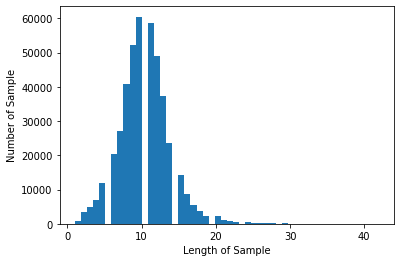

In [31]:
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('Length of Sample')
plt.ylabel('Number of Sample')
plt.show()

In [32]:
max_len = 30

## 패딩

In [33]:
# 패딩
X_train = pad_sequences(X_train, maxlen = max_len)

## 모델링

In [34]:
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

# model = Sequential()
# model.add(Embedding(vocab_size, 30))
# model.add(LSTM(128)) # overfitting -> dropout
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(optimizer = 'rmsprop',
#               loss = 'binary_crossentropy',
#               metrics = ['acc'])
model.summary()

Epoch 1/15
1371/1371 [==============================] - ETA: 0s - loss: 0.1260 - acc: 0.9477
Epoch 1: val_acc improved from -inf to 0.96090, saving model to best_model.h5
1371/1371 [==============================] - 32s 15ms/step - loss: 0.1260 - acc: 0.9477 - val_loss: 0.0960 - val_acc: 0.9609
Epoch 2/15
1368/1371 [============================>.] - ETA: 0s - loss: 0.0633 - acc: 0.9754
Epoch 2: val_acc improved from 0.96090 to 0.96751, saving model to best_model.h5
1371/1371 [==============================] - 16s 12ms/step - loss: 0.0632 - acc: 0.9755 - val_loss: 0.0830 - val_acc: 0.9675
Epoch 3/15
1367/1371 [============================>.] - ETA: 0s - loss: 0.0532 - acc: 0.9796
Epoch 3: val_acc improved from 0.96751 to 0.96949, saving model to best_model.h5
1371/1371 [==============================] - 16s 11ms/step - loss: 0.0532 - acc: 0.9796 - val_loss: 0.0782 - val_acc: 0.9695
Epoch 4/15
1369/1371 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9823
Epoch 4: val_

In [35]:
# 저장된 모델 불러오기, 평가
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_train, Y_train)

13701/13701 [==============================] - 52s 4ms/step - loss: 0.0383 - acc: 0.9860


[0.03827952593564987, 0.9859978556632996]

## 시각화

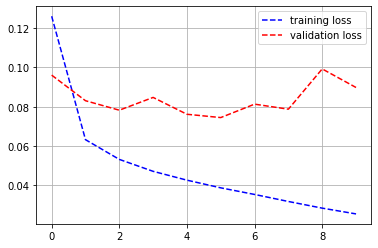

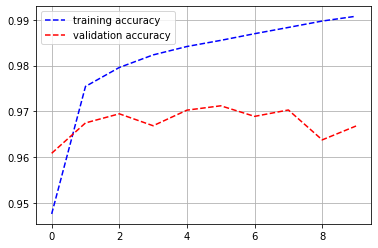

In [36]:
# 시각화

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'training loss')
plt.plot(val_loss, 'r--', label = 'validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'training accuracy')
plt.plot(val_acc, 'r--', label = 'validation accuracy')
plt.legend()
plt.grid()

plt.show()

## inference

In [37]:
# 임의 불용어
stopwords1 = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
stopwords2 = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
stopwords = list(set(stopwords1 + stopwords2))

def sentiment_predict(new_sentence):
  # # mecab
  # new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  # okt
  new_token = [word for word in okt.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen = max_len)
  score = float(loaded_model.predict(new_pad))

  if score > 0.5:
      print("{} -> 긍정 ({:.2f}%)".format(new_sentence, score * 100))
  else:
      print("{} -> 부정 ({:.2f}%)".format(new_sentence, (1-score) * 100))

In [38]:
sentiment_predict("[유럽개장] 장초반 상승세…英 1.03%↑")
sentiment_predict("[코스닥 마감]외국인 '팔자'에 750선 붕괴")

[유럽개장] 장초반 상승세…英 1.03%↑ -> 긍정 (99.95%)
[코스닥 마감]외국인 '팔자'에 750선 붕괴 -> 긍정 (99.94%)
